<a href="https://colab.research.google.com/github/amirNoori73/01-Deep-Learning-Course/blob/main/03_mnist_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


8


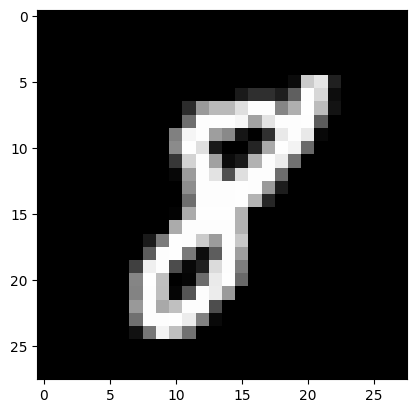

In [16]:
index = 17
x = train_images[index]
print(train_labels[index])

plt.gray()
plt.imshow(x)

In [17]:
np.min(train_images), np.max(train_images)

(np.uint8(0), np.uint8(255))

In [18]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [23]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [27]:
# model.build(input_shape=(None, 28, 28))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.fit(train_images, train_labels, epochs=1000, batch_size=256, validation_data=(test_images, test_labels), verbose=2)

Epoch 1/1000
235/235 - 5s - 22ms/step - accuracy: 0.8873 - loss: 0.4031 - val_accuracy: 0.9439 - val_loss: 0.1911
Epoch 2/1000
235/235 - 1s - 6ms/step - accuracy: 0.9532 - loss: 0.1590 - val_accuracy: 0.9588 - val_loss: 0.1341
Epoch 3/1000
235/235 - 1s - 3ms/step - accuracy: 0.9674 - loss: 0.1100 - val_accuracy: 0.9686 - val_loss: 0.1027
Epoch 4/1000
235/235 - 1s - 3ms/step - accuracy: 0.9750 - loss: 0.0840 - val_accuracy: 0.9707 - val_loss: 0.0969
Epoch 5/1000
235/235 - 1s - 6ms/step - accuracy: 0.9803 - loss: 0.0651 - val_accuracy: 0.9731 - val_loss: 0.0882
Epoch 6/1000
235/235 - 1s - 5ms/step - accuracy: 0.9838 - loss: 0.0538 - val_accuracy: 0.9749 - val_loss: 0.0826
Epoch 7/1000
235/235 - 1s - 6ms/step - accuracy: 0.9872 - loss: 0.0432 - val_accuracy: 0.9752 - val_loss: 0.0806
Epoch 8/1000
235/235 - 1s - 5ms/step - accuracy: 0.9898 - loss: 0.0358 - val_accuracy: 0.9769 - val_loss: 0.0784
Epoch 9/1000
235/235 - 1s - 3ms/step - accuracy: 0.9906 - loss: 0.0305 - val_accuracy: 0.9790 -

3


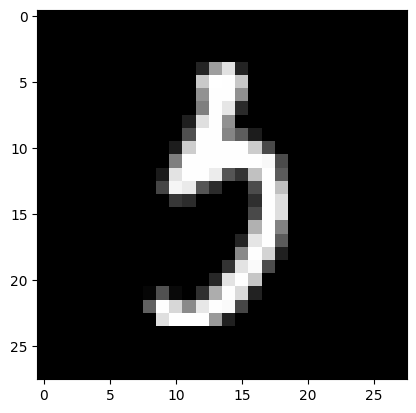

In [45]:
idx = 4740
plt.imshow(test_images[idx])
print(test_labels[idx])

In [46]:
model.predict(test_images[idx].reshape(1, 28, 28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[1.2157051e-22, 4.0439497e-20, 7.6774431e-33, 1.3706472e-11,
        7.9422427e-25, 1.0000000e+00, 2.7185190e-43, 2.3077069e-22,
        0.0000000e+00, 9.5042785e-10]], dtype=float32)

In [47]:
predicted_digit = np.argmax(model.predict(test_images[idx].reshape(1, 28, 28)))
print(predicted_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
5


In [44]:
# 1. Predict on the entire test dataset
test_predictions = model.predict(test_images)

# 2. Convert predictions to digits
predicted_labels = np.argmax(test_predictions, axis=1)

# 3. Compare predictions with actual labels and 4. Find indices of incorrect images
incorrect_indices = np.where(predicted_labels != test_labels)[0]

# Print the indices of incorrectly predicted images
print("Indices of incorrectly predicted test images:")
print(incorrect_indices)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Indices of incorrectly predicted test images:
[ 115  149  151  158  247  321  340  445  449  582  659  684  691  720
  947  951  956 1014 1039 1112 1156 1178 1226 1232 1242 1247 1299 1319
 1328 1393 1395 1414 1425 1494 1500 1522 1530 1546 1549 1609 1621 1681
 1722 1790 1800 1878 1901 1911 1981 2004 2016 2024 2043 2053 2070 2109
 2129 2135 2182 2224 2272 2293 2369 2387 2406 2488 2597 2607 2648 2654
 2720 2730 2896 2915 2921 2939 2953 3073 3115 3117 3225 3289 3330 3333
 3405 3422 3490 3503 3520 3549 3558 3559 3565 3567 3597 3751 3780 3796
 3808 3853 3893 3906 3941 3943 3976 4027 4065 4075 4078 4123 4199 4201
 4248 4360 4419 4437 4443 4497 4536 4601 4731 4740 4807 4814 4823 4860
 4880 4939 4943 4966 5331 5450 5457 5634 5642 5676 5734 5749 5757 5926
 5936 5937 5973 5982 5997 6009 6011 6023 6024 6026 6056 6059 6166 6555
 6571 6574 6576 6597 6625 6632 6651 6755 6783 6847 6926 7216 7545 8047
 8059 8062 8094 8408 9009 9015 9019 9024 9587 9634 9664 9679 